<a href="https://colab.research.google.com/github/Sobia-Qaiser/Machine-Learning-Tasks/blob/main/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
print("Training data shape:", train_images.shape)
print("Testing data shape:", test_images.shape)


Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [8]:
# 3️⃣ Class Names for CIFAR-10
# ================================================
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

/tmp/ipython-input-2359601446.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(train_labels[i])])


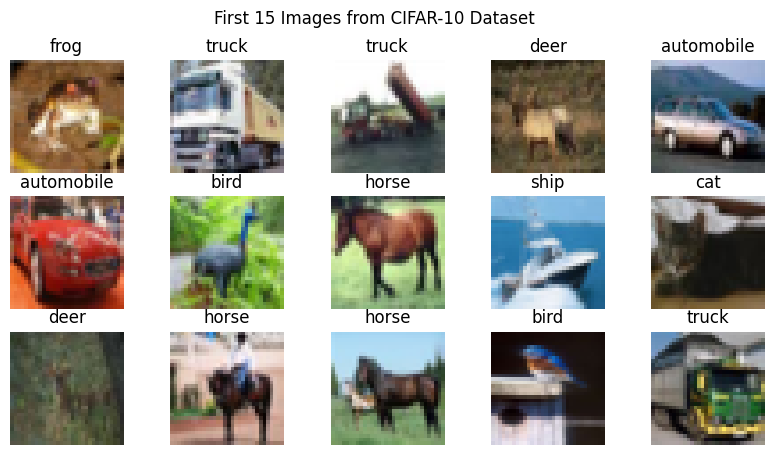

In [13]:
# 4️⃣ Visualize First 15 Images
# ================================================
plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(train_images[i])
    plt.title(class_names[int(train_labels[i])])
    plt.axis('off')
plt.suptitle("First 15 Images from CIFAR-10 Dataset")
plt.show()

In [5]:

train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# 4) Define Data Augmentation (on-the-fly)
# -------------------------
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),           # horizontal flip
    layers.RandomRotation(0.08),               # rotate up to ~8%
    layers.RandomTranslation(0.06,0.06),       # shift horizontally/vertically up to ~6%
    layers.RandomZoom(0.06)                    # zoom in/out up to ~6%
], name="data_augmentation")

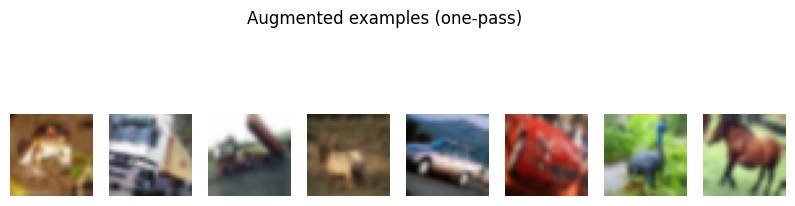

In [24]:
# Visualize augmented examples (for first image)
plt.figure(figsize=(10,3))
for i in range(8):
    aug = data_augmentation(tf.expand_dims(train_images[i], axis=0))
    plt.subplot(1,8,i+1)
    plt.imshow(aug[0].numpy())
    plt.axis('off')
plt.suptitle("Augmented examples (one-pass)")
plt.show()

In [25]:
# 5) Build model (same as your original, but prepend augmentation)
# -------------------------
model = models.Sequential([
    data_augmentation,  # <<< Augmentation layer applied only during training

    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [26]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (1, 32, 32, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (1, 30, 30, 32)        │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (1, 28, 28, 64)        │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (1, 50176)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (1, 64)                │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (1, 10)                │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,231,370 (12.33 MB)

 Trainable params: 3,231,370 (12.33 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# 6) Compile
# -------------------------
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# 7) Callbacks (recommended)
# -------------------------
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True)
reduce_lr  = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [29]:
# 8) Train
# -------------------------
history = model.fit(
    train_images, train_labels,
    epochs=25,
    batch_size=128,
    validation_data=(test_images, test_labels),
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.3464 - loss: 1.8094 - val_accuracy: 0.4929 - val_loss: 1.4196 - learning_rate: 0.0010
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5035 - loss: 1.3898 - val_accuracy: 0.5362 - val_loss: 1.3396 - learning_rate: 0.0010
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5436 - loss: 1.2803 - val_accuracy: 0.5738 - val_loss: 1.2249 - learning_rate: 0.0010
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5728 - loss: 1.2088 - val_accuracy: 0.5876 - val_loss: 1.1886 - learning_rate: 0.0010
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5954 - loss: 1.1483 - val_accuracy: 0.6247 - val_loss: 1.0712 - learning_rate: 0.0010
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6032 - loss: 1.1285 - val_accuracy: 0.6244 - val_loss: 1.0955 - learning_rate: 0.0010
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6164 - loss: 

In [30]:
# 9) Evaluate (train + test)
# -------------------------
train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=0)
test_loss, test_acc   = model.evaluate(test_images, test_labels, verbose=0)

print("\n✅ Model Evaluation Results (with Augmentation):")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")



✅ Model Evaluation Results (with Augmentation):
Training Accuracy: 0.7160
Testing Accuracy:  0.6794


In [31]:
# ✅ Updated Model: With Pooling Layers
# ================================================
from tensorflow.keras import layers, models

model = models.Sequential([
    data_augmentation,  # Data augmentation layer

    # 🔹 1st Convolution Block
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),  # Pooling layer reduces 32x32 → 16x16

    # 🔹 2nd Convolution Block
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),  # 16x16 → 8x8

    # 🔹 3rd Convolution Block (optional but helps better learning)
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),  # 8x8 → 4x4

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output: 10 classes
])

In [32]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (1, 32, 32, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (1, 32, 32, 32)        │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (1, 16, 16, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (1, 16, 16, 64)        │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (1, 8, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (1, 8, 8, 128)         │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (1, 4, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (1, 2048)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (1, 128)               │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (1, 10)                │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Compile Again
# ================================================
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
# Train Again
# ================================================
history = model.fit(
    train_images, train_labels,
    epochs=25,
    batch_size=128,
    validation_data=(test_images, test_labels),
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3083 - loss: 1.8877 - val_accuracy: 0.4724 - val_loss: 1.4788 - learning_rate: 0.0010
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4902 - loss: 1.4326 - val_accuracy: 0.5624 - val_loss: 1.2531 - learning_rate: 0.0010
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5521 - loss: 1.2640 - val_accuracy: 0.6069 - val_loss: 1.1286 - learning_rate: 0.0010
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5913 - loss: 1.1568 - val_accuracy: 0.6187 - val_loss: 1.0749 - learning_rate: 0.0010
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6128 - loss: 1.0935 - val_accuracy: 0.6592 - val_loss: 0.9733 - learning_rate: 0.0010
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6321 - loss: 1.0424 - val_accuracy: 0.6564 - val_loss: 0.9805 - learning_rate: 0.0010
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6522 - loss: 0.

In [35]:
train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=0)
test_loss, test_acc   = model.evaluate(test_images, test_labels, verbose=0)

print("\n✅ Model Evaluation Results (with Pooling + Augmentation):")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")


✅ Model Evaluation Results (with Pooling + Augmentation):
Training Accuracy: 0.7775
Testing Accuracy:  0.7483


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/tmp/ipython-input-2315090684.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = class_names[int(test_labels[i])]
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


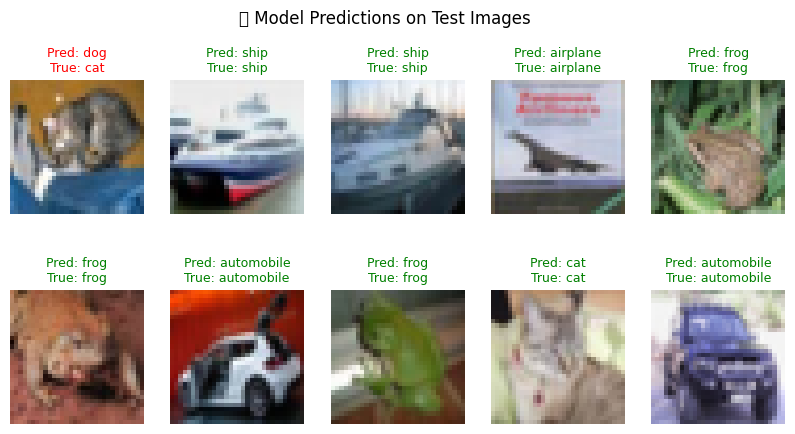

In [36]:
# ================================================
# 11️⃣ Make Predictions on Test Images
# ================================================
import numpy as np

# Get predictions (probabilities for each class)
predictions = model.predict(test_images)

# Convert probabilities to class labels (take index of highest probability)
predicted_labels = np.argmax(predictions, axis=1)

# -------------------------
# Check some sample predictions
# -------------------------
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(test_images[i])
    true_label = class_names[int(test_labels[i])]
    pred_label = class_names[int(predicted_labels[i])]

    # Green if correct, red if wrong
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color, fontsize=9)
    plt.axis('off')

plt.suptitle("✅ Model Predictions on Test Images", fontsize=12)
plt.show()


Saving portrait-beautiful-purebred-pussycat-with-shorthair-orange-collar-neck-sitting-floor-reacting-camera-flash-scared-looking-light-indoor_8353-12551.jpg to portrait-beautiful-purebred-pussycat-with-shorthair-orange-collar-neck-sitting-floor-reacting-camera-flash-scared-looking-light-indoor_8353-12551.jpg
✅ Uploaded: portrait-beautiful-purebred-pussycat-with-shorthair-orange-collar-neck-sitting-floor-reacting-camera-flash-scared-looking-light-indoor_8353-12551.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


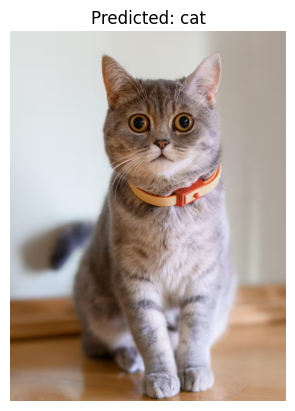

🔍 Predicted Class: cat


In [37]:
# ================================================
# 12️⃣ Predict on a Custom Image (Google Colab)
# ================================================
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Upload image from your computer
uploaded = files.upload()

# 2️⃣ Get the uploaded file name
for filename in uploaded.keys():
    image_path = filename
    print("✅ Uploaded:", image_path)

# 3️⃣ Load and preprocess the image
img = Image.open(image_path).resize((32, 32))    # CIFAR-10 images = 32x32
img_array = np.array(img) / 255.0                # Normalize 0–1
img_array = np.expand_dims(img_array, axis=0)    # Add batch dimension

# 4️⃣ Predict
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions)

# 5️⃣ Show image and result
plt.imshow(Image.open(image_path))
plt.title(f"Predicted: {class_names[predicted_label]}")
plt.axis('off')
plt.show()

print("🔍 Predicted Class:", class_names[predicted_label])


Saving premium_photo-1694819488591-a43907d1c5cc.jpg to premium_photo-1694819488591-a43907d1c5cc.jpg
✅ Uploaded: premium_photo-1694819488591-a43907d1c5cc.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


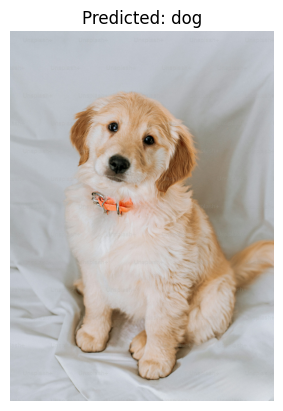

🔍 Predicted Class: dog


In [40]:
# ================================================
# 12️⃣ Predict on a Custom Image (Google Colab)
# ================================================
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Upload image from your computer
uploaded = files.upload()

# 2️⃣ Get the uploaded file name
for filename in uploaded.keys():
    image_path = filename
    print("✅ Uploaded:", image_path)

# 3️⃣ Load and preprocess the image
img = Image.open(image_path).resize((32, 32))    # CIFAR-10 images = 32x32
img_array = np.array(img) / 255.0                # Normalize 0–1
img_array = np.expand_dims(img_array, axis=0)    # Add batch dimension

# 4️⃣ Predict
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions)

# 5️⃣ Show image and result
plt.imshow(Image.open(image_path))
plt.title(f"Predicted: {class_names[predicted_label]}")
plt.axis('off')
plt.show()

print("🔍 Predicted Class:", class_names[predicted_label])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Saving country-chicken-500x500.webp to country-chicken-500x500.webp
✅ Uploaded: country-chicken-500x500.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


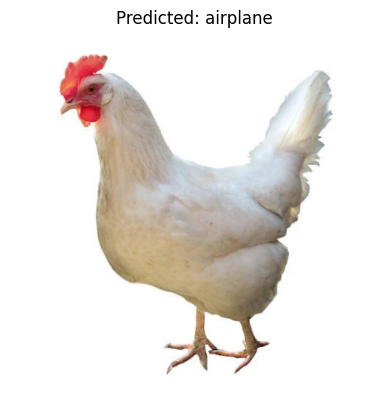

🔍 Predicted Class: airplane


In [41]:
# ================================================
# 12️⃣ Predict on a Custom Image (Google Colab)
# ================================================
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Upload image from your computer
uploaded = files.upload()

# 2️⃣ Get the uploaded file name
for filename in uploaded.keys():
    image_path = filename
    print("✅ Uploaded:", image_path)

# 3️⃣ Load and preprocess the image
img = Image.open(image_path).resize((32, 32))    # CIFAR-10 images = 32x32
img_array = np.array(img) / 255.0                # Normalize 0–1
img_array = np.expand_dims(img_array, axis=0)    # Add batch dimension

# 4️⃣ Predict
predictions = model.predict(img_array)
predicted_label = np.argmax(predictions)

# 5️⃣ Show image and result
plt.imshow(Image.open(image_path))
plt.title(f"Predicted: {class_names[predicted_label]}")
plt.axis('off')
plt.show()

print("🔍 Predicted Class:", class_names[predicted_label])